In [2]:
include("model_2D_IB.jl")

using Plots
function get_HSL(K_SIZE::Int)
    q::Vector{Vector{Float64}} = []
    dk = pi/K_SIZE
    k = range(0, pi-dk, length=K_SIZE)
    for ik in k
        kk::Vector{Float64} = [ik, 0.0]
        push!(q, kk)        
    end
    for ik in k
        kk::Vector{Float64} = [pi-ik, ik]
        push!(q, kk)        
    end
    for ik in k
        kk::Vector{Float64} = [0.0, pi-ik]
        push!(q, kk)        
    end
    for ik in k
        kk::Vector{Float64} = [ik, ik]
        push!(q, kk)        
    end
    return q
end

get_HSL (generic function with 1 method)

In [3]:
p = Parm(set_parm_Wdep(["0.5", "0.2", "0.3", "-2.0", "0.005", "200", "0.01", "./Sigma_U4.0_b100.0.csv", "4.0", "X", "Y", "Y"], 0.01)...)
q = get_HSL(p.K_SIZE)
q_size = size(q)[1]
Aw = zeros(Float64, p.w_size, q_size)
for id_q in 1:q_size
    H = set_H(q[id_q],p)
    for id_w in 1:p.w_size
        w = p.w_mesh[id_w]
        GR0::Array{ComplexF64,2} = -H + Matrix{Complex{Float64}}(w*I,2,2) + p.eta*Matrix{Complex{Float64}}(1.0im*I,2,2) - p.Σw[id_w]

        GR::Array{ComplexF64,2} = inv(GR0)
        Aw[id_w, id_q] = -imag(tr(GR))/pi
    end
end

In [5]:
count = 0
for id_q in 1:q_size
    for id_w in 1:p.w_size
        if(Aw[id_w, id_q]<0)
            count += 1
        end
    end
end
println(count)

122169


In [9]:
Aw_l = log.(abs.(Aw) .+ 1)

1001×800 Matrix{Float64}:
 0.000827646  0.000828433  0.000829193  …  0.00100439   0.00100263
 0.000837099  0.000837817  0.000838508     0.00101733   0.00101573
 0.00083863   0.000839271  0.000839886     0.00102593   0.00102451
 0.000837676  0.000838242  0.000838783     0.0010328    0.00103156
 0.000835582  0.000836078  0.000836548     0.00103852   0.00103744
 0.000832878  0.000833307  0.000833711  …  0.00104327   0.00104234
 0.000829821  0.000830187  0.00083053      0.00104715   0.00104637
 0.000826553  0.000826862  0.000827149     0.00105022   0.00104958
 0.000823163  0.000823419  0.000823653     0.00105252   0.00105201
 0.000819704  0.000819911  0.000820098     0.00105409   0.00105369
 0.000816214  0.000816378  0.000816521  …  0.00105494   0.00105465
 0.00081272   0.000812844  0.000812947     0.00105512   0.00105492
 0.00080924   0.000809327  0.000809395     0.00105465   0.00105453
 ⋮                                      ⋱               
 0.0010915    0.00109179   0.00109203      0.0

In [3]:
q_int = 1:4p.K_SIZE

1:800

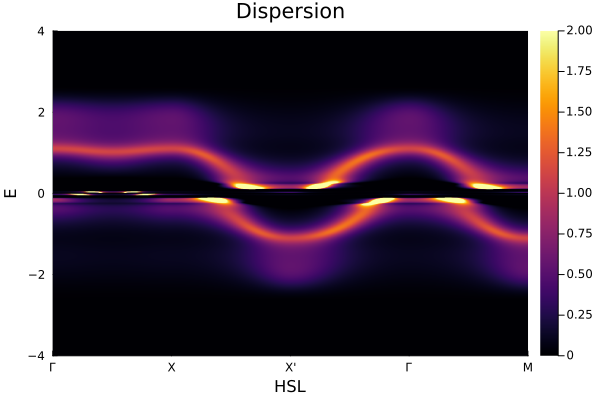

In [14]:
plot(q_int, p.w_mesh, Aw, st=:heatmap, label="e",xlabel="HSL",xticks=([0, p.K_SIZE, 2p.K_SIZE, 3p.K_SIZE, 4p.K_SIZE],["Γ", "X", "X'", "Γ", "M"]),ylabel="E",title="Dispersion", width=3.0, clim=(0,2.0))

In [15]:
S0::Matrix{ComplexF64} = [1.0 - 1.0im*p.eta 0.0; 0.0 3.0 - 1.0im*p.eta]
Aw_S0 = zeros(Float64, p.w_size, q_size)
for id_q in 1:q_size
    H = set_H(q[id_q],p)
    for id_w in 1:p.w_size
        w = p.w_mesh[id_w]
        GR0::Array{ComplexF64,2} = -H + Matrix{Complex{Float64}}(w*I,2,2) + p.eta*Matrix{Complex{Float64}}(1.0im*I,2,2) - S0

        GR::Array{ComplexF64,2} = inv(GR0)
        Aw_S0[id_w, id_q] = -imag(tr(GR))/pi
    end
end

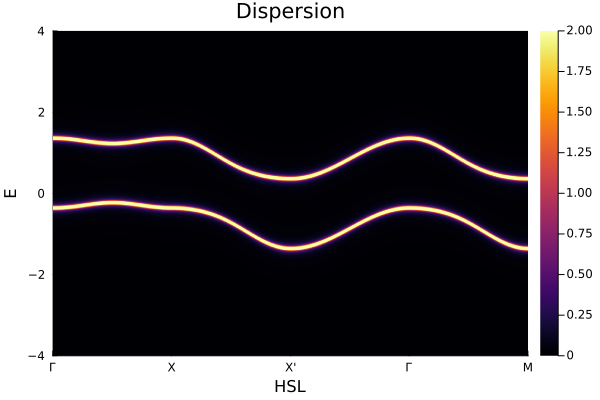

In [16]:
plot(q_int, p.w_mesh, Aw_S0, st=:heatmap, label="e",xlabel="HSL",xticks=([0, p.K_SIZE, 2p.K_SIZE, 3p.K_SIZE, 4p.K_SIZE],["Γ", "X", "X'", "Γ", "M"]),ylabel="E",title="Dispersion", width=3.0, clim=(0,2.0))